# <font color = red> Natural Language Processing Project

In this NLP project we will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.

**We will use the [Yelp Review Data Set from Kaggle]** (https://www.kaggle.com/c/yelp-recsys-2013).

- Each observation in this dataset is a review of a particular business by a particular user.

- The **"stars"** column is the number of stars **(1 through 5)** assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

- The **"cool"** column is the number of "cool" votes this review received from other Yelp users. 

- All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

- The **"useful"** and **"funny"** columns are similar to the "cool" column.



### <font color = green> Importing the Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

### <font color = green> Importing the Data set

In [3]:
yelp = pd.read_csv("yelp.csv")

In [5]:
yelp.shape

(10000, 10)

In [7]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [8]:
# Top 10 Rows

yelp.head(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


In [11]:
# Stats of the Columns

yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [12]:
yelp.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

In [16]:
yelp["business_id"].nunique()

4174

In [18]:
# Counting the Length of the Text Review

len(yelp["text"].iloc[3])

419

**Create a new column called "text length" which is the number of words in the text column.**

In [19]:
yelp["text_length"] = yelp["text"].apply(len)

In [20]:
yelp.head(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1,2094
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0,274
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0,349
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0,186


# EDA

Let's explore the data



**Using FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings.**

In [26]:
# Value counts of reviews on the basis of Stars

yelp["stars"].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [35]:
yelp[yelp["stars"]==5]["text_length"].mean()

624.9991009889122

<Figure size 864x576 with 0 Axes>

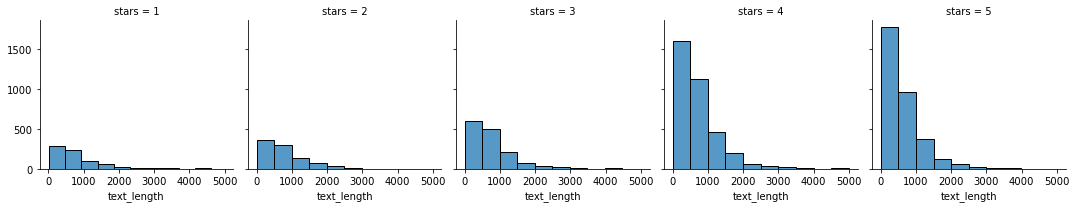

In [39]:
x = plt.figure(figsize=(12,8))
x = sns.FacetGrid(data=yelp, col="stars")
x.map(sns.histplot, "text_length", bins=10)

<font color = green> <b> Mean Text length of the Review is higher for the Low reviews as compare to the 5 star review.

**Create a boxplot of text length for each star category.**

<AxesSubplot:xlabel='stars', ylabel='text_length'>

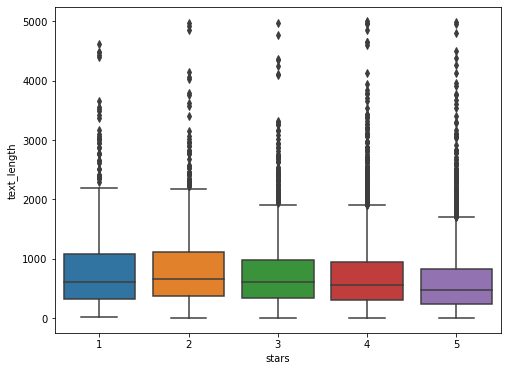

In [40]:
plt.figure(figsize=(8,6))
sns.boxplot(x="stars",y="text_length", data=yelp)

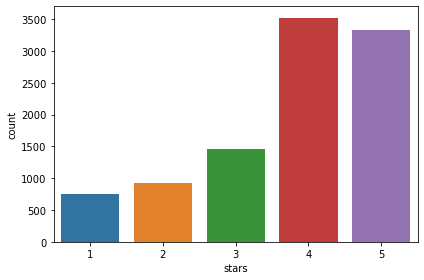

In [49]:
# Creating A count plot of  Stars

sns.countplot(x="stars", data=yelp)


**Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [55]:
yelp.groupby('stars')[['cool','useful','funny','text_length']].mean()

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Use the corr() method on that groupby dataframe to produce this dataframe:**

In [57]:
yelp.groupby('stars')[['cool','useful','funny','text_length']].mean().corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


**Then use seaborn to create a heatmap based off that .corr() dataframe:**

<AxesSubplot:>

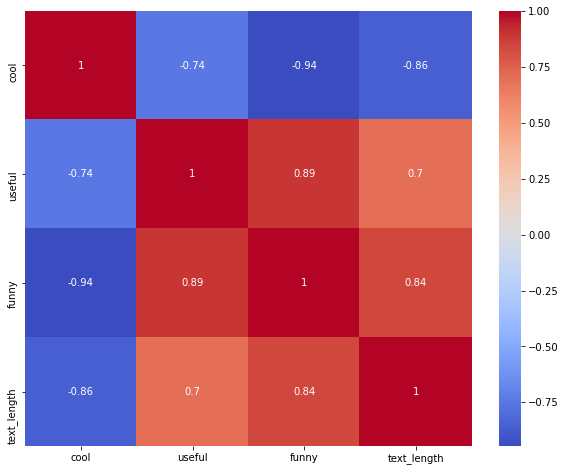

In [60]:
plt.figure(figsize=(10,8))
sns.heatmap(yelp.groupby('stars')[['cool','useful','funny','text_length']].mean().corr(), cmap='coolwarm', annot=True)

## NLP Classification Task

Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [62]:
yelp_class = yelp[(yelp["stars"]==1) | (yelp["stars"]==5)]

In [64]:
yelp_class["stars"].value_counts()

5    3337
1     749
Name: stars, dtype: int64

**Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [78]:
X = yelp_class["text"]
y = yelp_class["stars"]

**Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

In [70]:
CV = CountVectorizer()

In [79]:
X = CV.fit_transform(X)

In [81]:
X[0,11265]

2

In [82]:
#print(X)

## Train Test Split

Let's split our data into training and testing data.

** Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101 **

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

## Training a Model

Time to train a model!

** Import MultinomialNB and create an instance of the estimator and call is nb **

In [84]:
NB = MultinomialNB()

**Now fit nb using the training data.**

In [85]:
NB.fit(X_train,y_train)

MultinomialNB()

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

In [86]:
predict = NB.predict(X_test)

In [88]:
#predict

**Create a confusion matrix and classification report using these predictions and y_test**

In [89]:
print("Confusion Matrix")
print(confusion_matrix(y_test, predict))
print("\n")
print("Clasiification Report")
print(classification_report(y_test, predict))

Confusion Matrix
[[159  69]
 [ 22 976]]


Clasiification Report
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



**Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [90]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline

**Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [92]:
pipeline = Pipeline([
                    ("bow", CountVectorizer()),       # String the token integer count
                    ("TF-IDF", TfidfTransformer()),    # Token Integer Count to weighted TF-IDF Score
                    ("NB", MultinomialNB())           # train on TF-IDF vectors w/ Naive Bayes classifier
])

## Using the Pipeline

**Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text**

### Train Test Split

**Redo the train test split on the yelp_class object.**

In [93]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

**Now fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

In [95]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('TF-IDF', TfidfTransformer()),
                ('NB', MultinomialNB())])

Pipeline(steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Predictions and Evaluation

**Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

In [96]:
predict1 = pipeline.predict(X_test)

In [98]:
print("Confusion Matrix")
print(confusion_matrix(y_test, predict1))
print("\n")
print("Clasiification Report")
print(classification_report(y_test, predict1))

Confusion Matrix
[[  0 228]
 [  0 998]]


Clasiification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



Looks like Tf-Idf actually made things worse! That is it for this project. But there is still a lot more you can play with:

**Some other things to try....**
Try going back and playing around with the pipeline steps and seeing if creating a custom analyzer like we did in the lecture helps (note: it probably won't). Or recreate the pipeline with just the CountVectorizer() and NaiveBayes. Does changing the ML model at the end to another classifier help at all?

In [100]:
# Using Random Forest

from sklearn.ensemble import RandomForestClassifier

In [101]:
pipeline1 = Pipeline([
                    ("bow", CountVectorizer()),       # String the token integer count
                    ("TF-IDF", TfidfTransformer()),    # Token Integer Count to weighted TF-IDF Score
                    ("RF", RandomForestClassifier())   # train on TF-IDF vectors w/ Random Forest classifier
])

In [102]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [103]:
pipeline1.fit(X_train,y_train)
predict2 = pipeline1.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, predict2))
print("\n")
print("Clasiification Report")
print(classification_report(y_test, predict2))

Confusion Matrix
[[ 51 177]
 [  1 997]]


Clasiification Report
              precision    recall  f1-score   support

           1       0.98      0.22      0.36       228
           5       0.85      1.00      0.92       998

    accuracy                           0.85      1226
   macro avg       0.92      0.61      0.64      1226
weighted avg       0.87      0.85      0.82      1226



In [104]:
# Using Random Forest Without  TF-IDF Transformer

pipeline2 = Pipeline([
                    ("bow", CountVectorizer()),       # String the token integer count
                    ("RF", RandomForestClassifier())   # train on TF-IDF vectors w/ Random Forest classifier
])

In [105]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [106]:
pipeline2.fit(X_train,y_train)
predict3 = pipeline2.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, predict3))
print("\n")
print("Clasiification Report")
print(classification_report(y_test, predict3))

Confusion Matrix
[[ 55 173]
 [  3 995]]


Clasiification Report
              precision    recall  f1-score   support

           1       0.95      0.24      0.38       228
           5       0.85      1.00      0.92       998

    accuracy                           0.86      1226
   macro avg       0.90      0.62      0.65      1226
weighted avg       0.87      0.86      0.82      1226

